In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
import seaborn as sns

In [98]:
#importing the dataset
wines_df=pd.read_csv('/content/Cleaned_wines_SPA (1).csv')

In [99]:
wines_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [100]:
#getting the numeric columns to plot graphs to identify outliers
numeric_cols=wines_df.select_dtypes(exclude=object).columns.values
numeric_cols

array(['year', 'rating', 'num_reviews', 'price', 'body', 'acidity'],
      dtype=object)

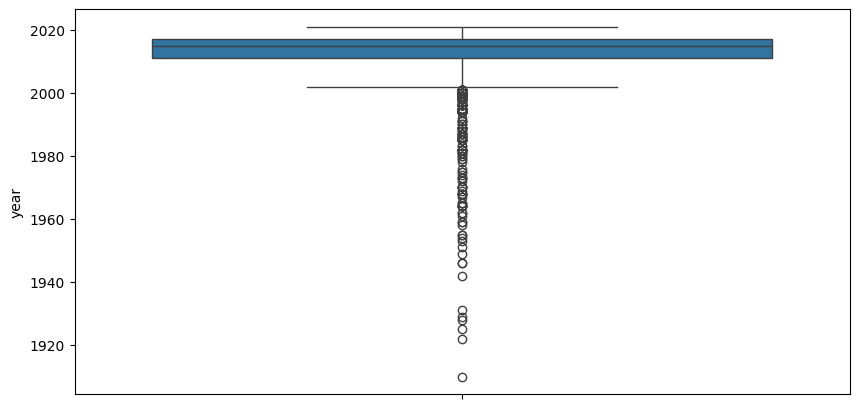

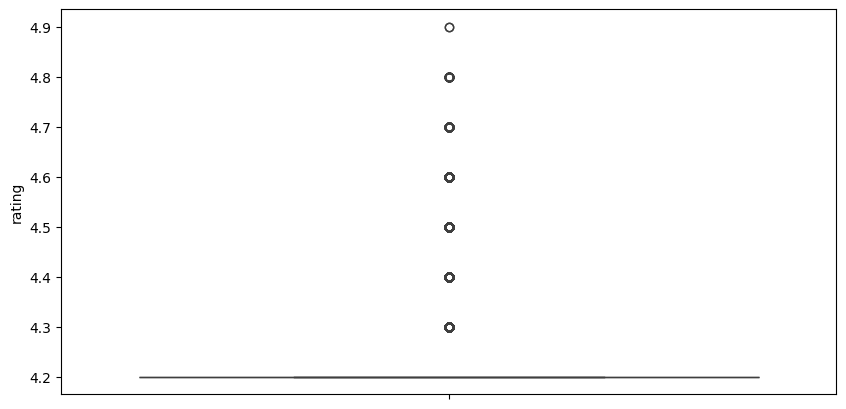

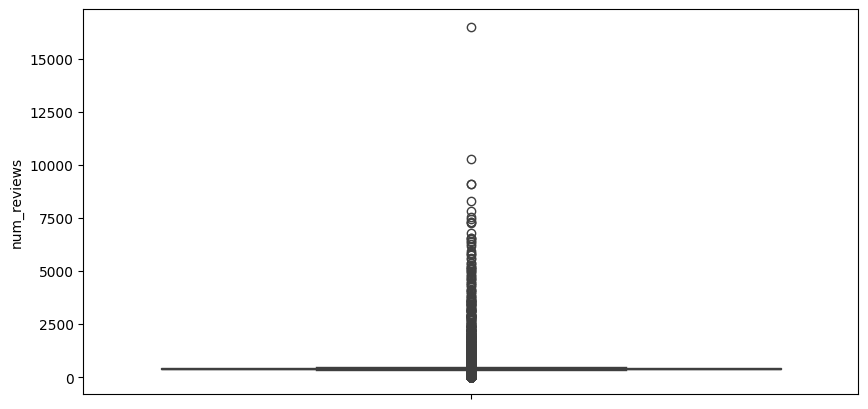

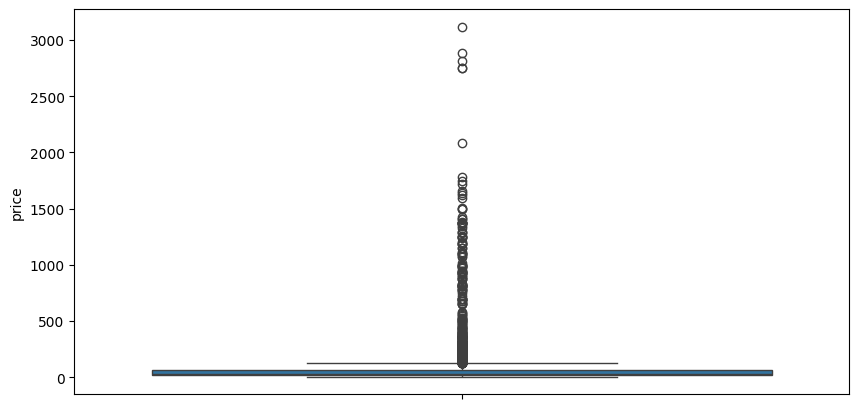

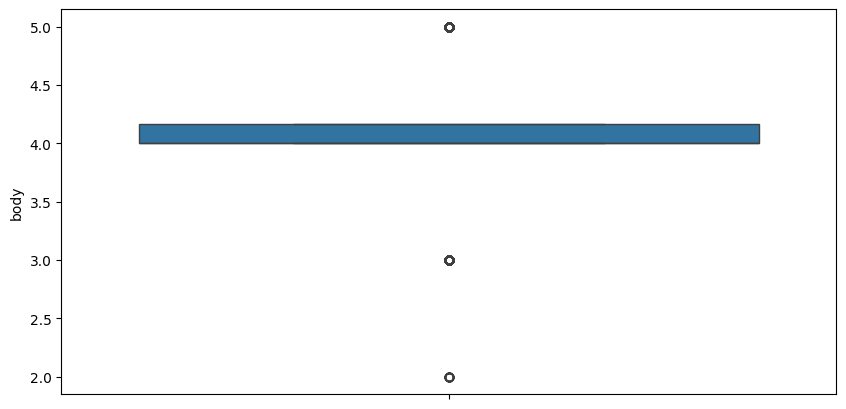

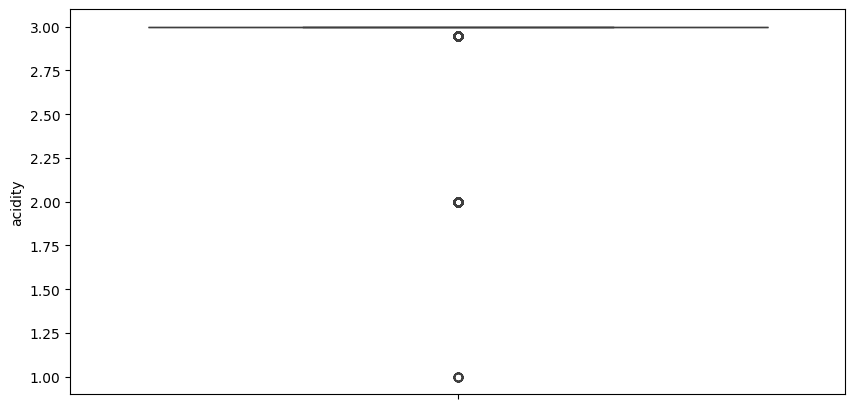

In [101]:
#box plot of differenct numeric columns

i=1
for col in numeric_cols:
  plt.figure(figsize=(10,5))
  plt.figure(i)
  sns.boxplot(wines_df[col])
  i+=1

In [102]:
#Creating a copy of the original dataframe on which we will perform preprocessing.
processed_wines_df=wines_df.copy()

In [103]:
#Using the inter quartile range to remove outlier
def removeOutliers(df,col_name):
  q1=np.percentile(df[col_name],5,method="midpoint")
  q3=np.percentile(df[col_name],95,method="midpoint")
  iqr=q3 - q1
  upper_limit=q3 + 1.5*iqr
  lower_limit=q1 - 1.5*iqr
  df_processed = df[(df[col_name] >= lower_limit) & (df[col_name] <= upper_limit)]
  return df_processed

processed_wines_df=removeOutliers(processed_wines_df,'price') #removing outliers in the price columns

<Axes: ylabel='price'>

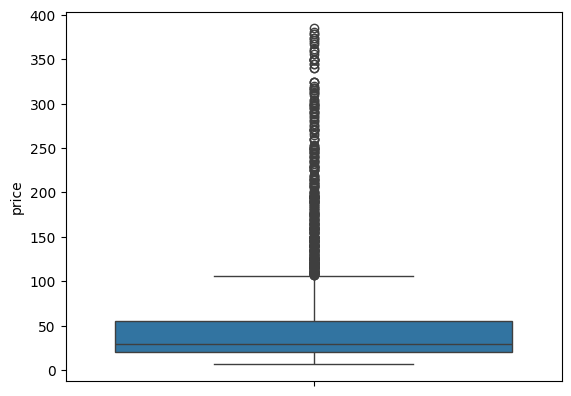

In [104]:
sns.boxplot(processed_wines_df['price'])

<Axes: ylabel='num_reviews'>

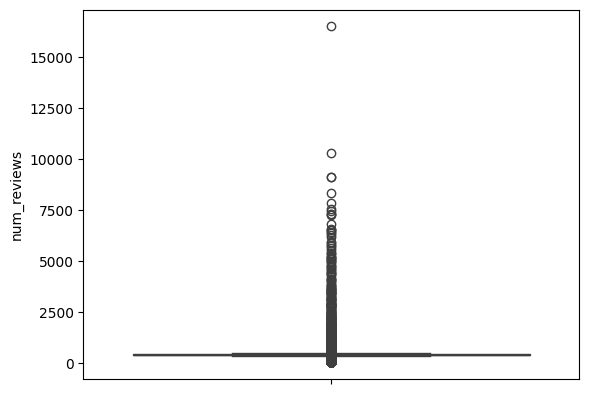

In [105]:
#before
sns.boxplot(processed_wines_df['num_reviews'])

In [106]:
#removing outliers in num_reviews column
processed_wines_df=removeOutliers(processed_wines_df,'num_reviews')

<Axes: ylabel='num_reviews'>

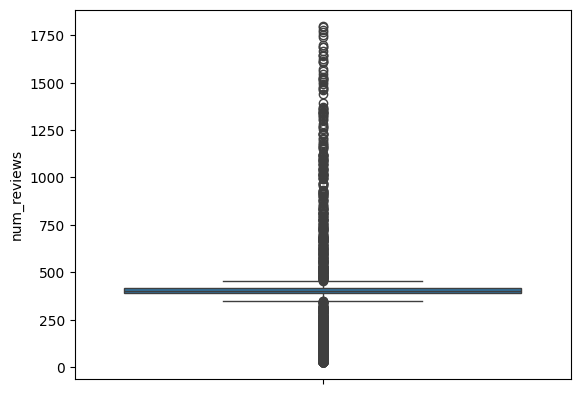

In [107]:
#after
sns.boxplot(processed_wines_df['num_reviews'])

In [108]:
processed_wines_df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50000,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95000,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00000,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00000,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00000,Ribera Del Duero Red,5.0,3.0
11,Pago de Carraovejas,El Anejon,2016,4.8,454,Espana,Ribera del Duero,105.15000,Ribera Del Duero Red,5.0,3.0
14,Toro Albala,Don PX Convento Seleccion,1946,4.8,398,Espana,Montilla-Moriles,350.00000,Pedro Ximenez,5.0,1.0
15,Pago de Carraovejas,Cuesta de Las Liebres,2015,4.8,372,Espana,Ribera del Duero,166.18000,Ribera Del Duero Red,5.0,3.0
18,Bodegas El Nido,El Nido,2018,4.8,217,Espana,Jumilla,195.62738,Red,4.0,3.0
22,Toro Albala,Don PX Convento Seleccion,1931,4.8,139,Espana,Montilla-Moriles,244.85000,Pedro Ximenez,5.0,1.0


In [109]:
processed_wines_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6384 entries, 1 to 6671
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6384 non-null   object 
 1   wine         6384 non-null   object 
 2   year         6384 non-null   int64  
 3   rating       6384 non-null   float64
 4   num_reviews  6384 non-null   int64  
 5   country      6384 non-null   object 
 6   region       6384 non-null   object 
 7   price        6384 non-null   float64
 8   type         6384 non-null   object 
 9   body         6384 non-null   float64
 10  acidity      6384 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 598.5+ KB


In [110]:
processed_wines_df.nunique()

,0
winery,410
wine,694
year,61
rating,8
num_reviews,618
country,1
region,65
price,1009
type,21
body,5


In [111]:
px.scatter(data_frame=processed_wines_df,x=processed_wines_df['winery'],y=processed_wines_df['price'])

In [112]:
px.scatter(data_frame=processed_wines_df,x=processed_wines_df['region'],y=processed_wines_df['price'])

In [113]:
# Using Target encoding for the region column as it has a noticable relation with price and the number of catagories is too large.
processed_wines_df['price_encoded_region']=processed_wines_df['region'].map(processed_wines_df.groupby('region')['price'].mean())

In [114]:
px.scatter(data_frame=processed_wines_df,x=processed_wines_df['year'],y=processed_wines_df['price'])

In [115]:
px.scatter(data_frame=processed_wines_df,x=processed_wines_df['wine'],y=processed_wines_df['price'])

In [116]:
# Using Target encoding for the wine column as it has a noticable relation with price and the number of unique values is too large.
processed_wines_df['price_encoded_wine']=processed_wines_df['wine'].map(processed_wines_df.groupby('wine')['price'].mean())

In [117]:
processed_wines_df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_encoded_region,price_encoded_wine
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50000,Tempranillo,4.0,2.0,63.160748,302.006667
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95000,Ribera Del Duero Red,5.0,3.0,57.830759,337.212500
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00000,Ribera Del Duero Red,5.0,3.0,57.830759,337.212500
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00000,Ribera Del Duero Red,5.0,3.0,57.830759,325.163333
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00000,Ribera Del Duero Red,5.0,3.0,57.830759,337.212500
11,Pago de Carraovejas,El Anejon,2016,4.8,454,Espana,Ribera del Duero,105.15000,Ribera Del Duero Red,5.0,3.0,57.830759,90.125000
14,Toro Albala,Don PX Convento Seleccion,1946,4.8,398,Espana,Montilla-Moriles,350.00000,Pedro Ximenez,5.0,1.0,167.327273,228.735000
15,Pago de Carraovejas,Cuesta de Las Liebres,2015,4.8,372,Espana,Ribera del Duero,166.18000,Ribera Del Duero Red,5.0,3.0,57.830759,120.286667
18,Bodegas El Nido,El Nido,2018,4.8,217,Espana,Jumilla,195.62738,Red,4.0,3.0,99.106140,186.035354
22,Toro Albala,Don PX Convento Seleccion,1931,4.8,139,Espana,Montilla-Moriles,244.85000,Pedro Ximenez,5.0,1.0,167.327273,228.735000
